In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
%matplotlib inline

In [45]:
dataframe = pd.read_csv("C:\\Users\\sameer\\Desktop\\Datasets\\canada_per_capita_income.csv")
dataframe.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [46]:
dataframe.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [47]:
dataframe.tail()

,year,per capita income (US$)
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


In [48]:
dataframe.rename(columns={"per capita income (US$)":"income"}, inplace = True)
dataframe.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


Text(0.5, 0, 'Year')

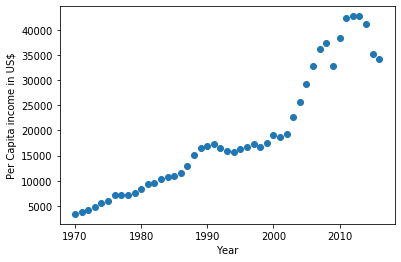

In [49]:
plt.scatter(dataframe.year,dataframe.income)
plt.ylabel('Per Capita income in US$')
plt.xlabel('Year')

In [50]:
d_model = linear_model.LinearRegression()

In [51]:
d_model.fit(dataframe[['year']],dataframe.income) # First argument is a 2-D array

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
d_model.predict([[1974]]) # input is year

array([3179.30063417])

In [53]:
d_model.coef_

array([828.46507522])

In [54]:
d_model.intercept_

-1632210.7578554575

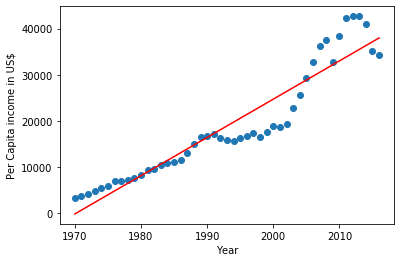

In [55]:
plt.scatter(dataframe.year,dataframe.income)
plt.ylabel('Per Capita income in US$')
plt.xlabel('Year')
plt.plot(dataframe.year,d_model.predict(dataframe[['year']]),color='red')

In [56]:
x = dataframe.values[:,0:1]
y = dataframe.values[:,1:2]

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=(0.3),random_state = 45)

In [58]:
model = linear_model.LinearRegression()
model_fit = model.fit(x_train,y_train)

In [59]:
model_predict = model_fit.predict(x_test)

In [60]:
model_predict

array([[35715.85404666],
       [ 5312.68467301],
       [34072.43948593],
       [ 6956.09923375],
       [ 3669.27011227],
       [12708.05019633],
       [27498.78124297],
       [15994.87931781],
       [ -439.26628957],
       [14351.46475707],
       [15173.17203744],
       [29963.90308408],
       [10242.92835522],
       [26677.0739626 ],
       [37359.2686074 ]])

In [61]:
error = np.sqrt(mean_squared_error(y_test,model_predict))
error

3623.7020006860776

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("C:\\Users\\sameer\\Desktop\\Datasets\\canada_per_capita_income.csv",index_col = [0],squeeze = True)

In [ ]:
data.head()

In [ ]:
data.plot(figsize = (10,5))

In [ ]:
data_mean = data.rolling(window = 4).mean()
data_mean.plot(figsize = (10,5))

In [ ]:
data_mean.hist()

In [ ]:
dataframe['income'] = dataframe['income'] - dataframe['income'].shift(1)
dataframe.plot()
plt.axhline(dataframe['income'].mean())

In [ ]:
data1.mean()

In [ ]:
data.hist()

In [ ]:
d1 = data[0:24]
d2 = data[24:47]

In [ ]:
d1.mean()

In [ ]:
d2.mean()

In [ ]:
p_values = range(0,4)
d_values = range(0,3)
q_values = range(0,4)

In [ ]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            prediction = list()
            order = (p,d,q)
            for i in range(len(x_test)):
                try:
                    mod = ARIMA(x_train,order)
                    mod_fit = mod.fit(disp =0)
                    pred_y = mod_fit.forecast()[0]
                    prediction.append(pred_y)
                    error = np.sqrt(mean_squared_error(x_test,prediction))
                    print('ARIMA%s  , RMS = %.2f'%(order,error))
                except:
                    continue

# Making series stationary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
%matplotlib inline

In [3]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("C:\\Users\\sameer\\Desktop\\Datasets\\canada_per_capita_income.csv",squeeze = False)

In [5]:
data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [6]:
data.rename(columns={"per capita income (US$)":"income"}, inplace = True)
data.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [7]:
data.columns

Index(['year', 'income'], dtype='object')

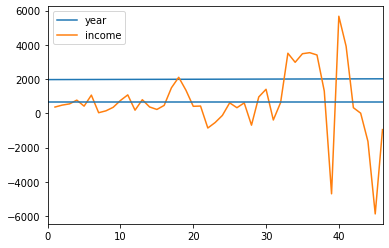

In [8]:
data['income'] = data['income'] - data['income'].shift(1)
data.plot()
plt.axhline(data['income'].mean())

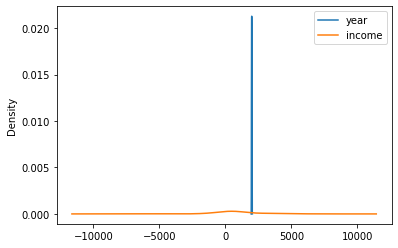

In [9]:
data.plot(kind = 'kde')

In [10]:
data = data.dropna()
data

,year,income
1,1971,368.998898
2,1972,482.877549
3,1973,553.287764
4,1974,772.051335
5,1975,421.629763
6,1976,1063.987046
7,1977,37.994778
8,1978,147.840865
9,1979,354.945646
10,1980,753.055439


In [11]:
data.index = data['year']
data.drop(columns = 'year',axis = 1,inplace = True)
data

,income
year,
1971,368.998898
1972,482.877549
1973,553.287764
1974,772.051335
1975,421.629763
1976,1063.987046
1977,37.994778
1978,147.840865
1979,354.945646


In [12]:
data.describe()

,income
count,46.000000
mean,670.215100
std,1921.352610
min,-5864.704620
25%,157.142580
50%,473.406614
75%,1246.109285
max,5665.346070


In [13]:
x_train = data.values[0:32]
x_test = data.values[32:47]

In [14]:
x_test

array([[ 3507.25072],
       [ 2979.72087],
       [ 3478.90854],
       [ 3540.20721],
       [ 3406.21832],
       [ 1302.00487],
       [-4691.30927],
       [ 5665.34607],
       [ 3914.18832],
       [  330.54476],
       [   11.2124 ],
       [-1636.57477],
       [-5864.70462],
       [ -945.99535]])

In [15]:
model = ARIMA(x_train,order = (2,1,1))

In [16]:
model_fit = model.fit()

In [17]:
pred = model_fit.forecast(steps=14)[0]
pred

array([479.76841238, 376.31445325, 346.54342868, 337.33971327,
       330.83212264, 324.12812662, 317.22702027, 310.27438139,
       303.31561697, 296.35754092, 289.39998817, 282.44256381,
       275.48515309, 268.52774016])

In [18]:
model_fit.aic

497.7770012723977

In [19]:
np.sqrt(mean_squared_error(x_test,pred))

3339.872755557697

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
inc = pd.read_csv("C:\\Users\\sameer\\Desktop\\Datasets\\canada_per_capita_income.csv",index_col = [0])
inc

,per capita income (US$)
year,
1970,3399.299037
1971,3768.297935
1972,4251.175484
1973,4804.463248
1974,5576.514583
1975,5998.144346
1976,7062.131392
1977,7100.126170
1978,7247.967035


In [22]:
inc_arr = inc.values
inc_arr

array([[ 3399.299037],
       [ 3768.297935],
       [ 4251.175484],
       [ 4804.463248],
       [ 5576.514583],
       [ 5998.144346],
       [ 7062.131392],
       [ 7100.12617 ],
       [ 7247.967035],
       [ 7602.912681],
       [ 8355.96812 ],
       [ 9434.390652],
       [ 9619.438377],
       [10416.53659 ],
       [10790.32872 ],
       [11018.95585 ],
       [11482.89153 ],
       [12974.80662 ],
       [15080.28345 ],
       [16426.72548 ],
       [16838.6732  ],
       [17266.09769 ],
       [16412.08309 ],
       [15875.58673 ],
       [15755.82027 ],
       [16369.31725 ],
       [16699.82668 ],
       [17310.75775 ],
       [16622.67187 ],
       [17581.02414 ],
       [18987.38241 ],
       [18601.39724 ],
       [19232.17556 ],
       [22739.42628 ],
       [25719.14715 ],
       [29198.05569 ],
       [32738.2629  ],
       [36144.48122 ],
       [37446.48609 ],
       [32755.17682 ],
       [38420.52289 ],
       [42334.71121 ],
       [42665.25597 ],
       [426

In [23]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler = scaler.fit(inc_arr)

In [24]:
scaler.data_min_

array([3399.299037])

In [25]:
scaler.data_max_

array([42676.46837])

In [26]:
income_normalize = scaler.transform(inc_arr)

In [27]:
for i in range(5):
    print(income_normalize[i])

[0.]
[0.00939474]
[0.02168885]
[0.0357756]
[0.05543209]


In [28]:
x_train = income_normalize[0:32]
x_test = income_normalize[32:47]

In [29]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [30]:
model = ARIMA(x_train,order = (2,1,1))

In [31]:
model_fit = model.fit()

In [32]:
model_forecast = model_fit.forecast(steps = 15)[0]
model_forecast

array([0.39630166, 0.41338884, 0.43263454, 0.45150888, 0.4691306 ,
       0.4854006 , 0.50053179, 0.51481483, 0.52851583, 0.54184241,
       0.55494182, 0.56791138, 0.58081167, 0.59367825, 0.60653072])

In [33]:
x_test

array([[0.40310635],
       [0.49240125],
       [0.56826519],
       [0.65683849],
       [0.74697246],
       [0.83369506],
       [0.86684422],
       [0.74740309],
       [0.89164327],
       [0.99129883],
       [0.99971453],
       [1.        ],
       [0.95833267],
       [0.8090168 ],
       [0.78493168]])

In [34]:
model_forecast_reshape = model_forecast.reshape(len(model_forecast),1)
model_forecast_reverse = scaler.inverse_transform(model_forecast_reshape)

In [35]:
model_forecast_reverse

array([[18964.90652779],
       [19636.0423707 ],
       [20391.95895108],
       [21133.28959136],
       [21825.42124585],
       [22464.4607781 ],
       [23058.77075741],
       [23619.7683074 ],
       [24157.90485113],
       [24681.33520695],
       [25195.8428107 ],
       [25705.25044942],
       [26211.93730009],
       [26717.30021024],
       [27222.10868365]])

In [36]:
x_test_reshape = x_test.reshape(len(x_test),1)
x_test_reverse = scaler.inverse_transform(x_test_reshape)

In [37]:
x_test_reverse

array([[19232.17556],
       [22739.42628],
       [25719.14715],
       [29198.05569],
       [32738.2629 ],
       [36144.48122],
       [37446.48609],
       [32755.17682],
       [38420.52289],
       [42334.71121],
       [42665.25597],
       [42676.46837],
       [41039.8936 ],
       [35175.18898],
       [34229.19363]])

In [43]:
error = np.sqrt(mean_squared_error(x_test_reverse,model_forecast_reverse))
error

11968.255026207307